<p style= "background-color:#3ca7e1;font-family:Arial;color:#FFFFFF;font-size:200%;text-align:center;border-radius:20px 20px;border-style:solid;border-width:10px;border-color:#3ca7e1;"><b>Limpieza y visualización de datos</b></p>
 
**Pablo Arriagada Ojeda | 2023**

Este subproyecto busca limpiar los datos obtenidos mediante Web Scraping desde www.chileautos.cl

Los datos presentan un desafío al contener una gran cantidad de errores y situaciones que se pueden aprovechar, como la existencia de una gran cantidad de valores faltantes, datos que pueden obtenerse de una columna, formatos incorrectos, columnas repetitivas, entre otros.

El resultado de este proyecto fue un dataset limpio, con valores faltantes controlados, además de visualizaciones que permiten entender de mejor manera los datos.

***
# Primeras impresiones

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 

In [2]:
url = 'Mazda ChileAutos.csv'

df= pd.read_csv(url, sep= ';')
df_og = df.copy()
df.head()

,id,enlace,titulo,marca,modelo,motor,combustible,kilometraje,transmision,precio,localidad,region
0,CL-AD-14735282,https://www.chileautos.cl/vehiculos/detalles/2...,2013 Mazda 6 2.0 Skyactiv-G LE Auto,MAZDA,MAZDA6,20.0,Bencina,103900,Automatica,10000000,Puente Alto,NaN
1,CL-AD-15499247,https://www.chileautos.cl/vehiculos/detalles/2...,2020 Mazda Bt-50 3.2 DSL SDX Auto Hi Rider 4WD,MAZDA,BT-50,32.0,Diesel,92000,Automatica,20900000,Vitacura,NaN
2,CL-AD-15185232,https://www.chileautos.cl/vehiculos/detalles/2...,2019 Mazda Bt-50 2.2 DSL Manual SDX 4WD,MAZDA,BT-50,22.0,Diesel,94000,Manual,21700000,Galvarino,Araucania
3,CL-AD-15158840,https://www.chileautos.cl/vehiculos/detalles/2...,2020 Mazda 3 Sport,NaN,NaN,NaN,Bencina,25000,Automatica,19800000,Vina del Mar,Valparaiso
4,CP-AD-8267126,https://www.chileautos.cl/vehiculos/detalles/2...,2013 Mazda 2 1.5 V,MAZDA,MAZDA2,15.0,Bencina,61450,Manual,7390000,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1012 entries, 0 to 1011
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           1012 non-null   object 
 1   enlace       1012 non-null   object 
 2   titulo       1012 non-null   object 
 3   marca        708 non-null    object 
 4   modelo       708 non-null    object 
 5   motor        708 non-null    float64
 6   combustible  1012 non-null   object 
 7   kilometraje  1012 non-null   int64  
 8   transmision  1012 non-null   object 
 9   precio       1012 non-null   int64  
 10  localidad    928 non-null    object 
 11  region       299 non-null    object 
dtypes: float64(1), int64(2), object(9)
memory usage: 95.0+ KB


### Datos faltantes
Faltan datos en las columnas: 

- marca
- modelo
- motor
- combustible
- localidad
- region

La mayoría de los datos están en formato object, por lo que hay que darles formato según corresponda.

In [4]:
#Borrar duplicados

df.drop_duplicates(inplace = True)
df.shape

(1011, 12)

Teníamos 1 observación duplicada

***
# Modificación de variables:
### Obtener año, marca y modelo desde el Título

Podemos ver que en la columna título tenemos las variables de año, marca y modelo, escritas tanto en formato año-marca-modelo, como tambien en marca-modelo-año, por lo que definiremos funciones que permitan extraer estas variables y almacenarlas en nuevas columnas por separado.

In [5]:
df.drop(columns = ['region', 'marca', 'modelo'], inplace= True)
df.head(10)

,id,enlace,titulo,motor,combustible,kilometraje,transmision,precio,localidad
0,CL-AD-14735282,https://www.chileautos.cl/vehiculos/detalles/2...,2013 Mazda 6 2.0 Skyactiv-G LE Auto,20.0,Bencina,103900,Automatica,10000000,Puente Alto
1,CL-AD-15499247,https://www.chileautos.cl/vehiculos/detalles/2...,2020 Mazda Bt-50 3.2 DSL SDX Auto Hi Rider 4WD,32.0,Diesel,92000,Automatica,20900000,Vitacura
2,CL-AD-15185232,https://www.chileautos.cl/vehiculos/detalles/2...,2019 Mazda Bt-50 2.2 DSL Manual SDX 4WD,22.0,Diesel,94000,Manual,21700000,Galvarino
3,CL-AD-15158840,https://www.chileautos.cl/vehiculos/detalles/2...,2020 Mazda 3 Sport,NaN,Bencina,25000,Automatica,19800000,Vina del Mar
4,CP-AD-8267126,https://www.chileautos.cl/vehiculos/detalles/2...,2013 Mazda 2 1.5 V,15.0,Bencina,61450,Manual,7390000,NaN
5,CP-AD-8272121,https://www.chileautos.cl/vehiculos/detalles/2...,2020 Mazda 3 2.0 Skyactiv-G Auto V HB,20.0,Bencina,54731,Automatica,14990000,Araucania
6,CP-AD-8263708,https://www.chileautos.cl/vehiculos/detalles/2...,2021 Mazda Cx-30 2.0 S Skyactive-G,20.0,Bencina,35000,Manual,16280000,NaN
7,GI-AD-314918,https://www.chileautos.cl/vehiculos/detalles/m...,Mazda 3 2021 2.0 V 7G AT,NaN,Bencina,25179,Automatica,17990000,NaN
8,GI-AD-470450,https://www.chileautos.cl/vehiculos/detalles/m...,Mazda Cx-5 2019 2.0 R AWD 6MT 5P,NaN,Bencina,63100,Manual,15690000,NaN
9,GI-AD-476661,https://www.chileautos.cl/vehiculos/detalles/m...,Mazda 3 2021 2.0 S 6MT 4P,NaN,Bencina,49812,Manual,13290000,Araucania


In [6]:
def extraer_año(texto):
    palabras = texto.split()
    for palabra in palabras:
        if palabra.isnumeric() and len(palabra) == 4:
            return palabra
    return ''

def extraer_marca(texto):
    marcas = ['Mazda', 'MAZDA']
    palabras = texto.split()
    for palabra in palabras:
        if palabra in marcas:
            return palabra
    return ''

def extraer_modelo(texto):
    
    palabras = texto.split()
    año = extraer_año(texto)
    marca = extraer_marca(texto)
    if año:
        palabras.remove(año)
    if marca:
        palabras.remove(marca)
    if palabras:
        return palabras[0]
    return ' '.join(palabras)

df['año'] = df['titulo'].apply(lambda x: extraer_año(x))
df['marca'] = df['titulo'].apply(lambda x: extraer_marca(x))
df['modelo'] = df['titulo'].apply(lambda x: extraer_modelo(x))


regex = r'([1-9]\.[0-9])' 

df['tamaño_motor'] = None

for index, row in df.iterrows():
    palabras = row['titulo'].split()
    
    for palabra in palabras:
        coincidencia = re.search(regex, palabra)
        if coincidencia:
            if coincidencia.group(1):
                df.at[index, 'tamaño_motor'] = coincidencia.group(1)
            
df.head()

,id,enlace,titulo,motor,combustible,kilometraje,transmision,precio,localidad,año,marca,modelo,tamaño_motor
0,CL-AD-14735282,https://www.chileautos.cl/vehiculos/detalles/2...,2013 Mazda 6 2.0 Skyactiv-G LE Auto,20.0,Bencina,103900,Automatica,10000000,Puente Alto,2013,Mazda,6,2.0
1,CL-AD-15499247,https://www.chileautos.cl/vehiculos/detalles/2...,2020 Mazda Bt-50 3.2 DSL SDX Auto Hi Rider 4WD,32.0,Diesel,92000,Automatica,20900000,Vitacura,2020,Mazda,Bt-50,3.2
2,CL-AD-15185232,https://www.chileautos.cl/vehiculos/detalles/2...,2019 Mazda Bt-50 2.2 DSL Manual SDX 4WD,22.0,Diesel,94000,Manual,21700000,Galvarino,2019,Mazda,Bt-50,2.2
3,CL-AD-15158840,https://www.chileautos.cl/vehiculos/detalles/2...,2020 Mazda 3 Sport,NaN,Bencina,25000,Automatica,19800000,Vina del Mar,2020,Mazda,3,None
4,CP-AD-8267126,https://www.chileautos.cl/vehiculos/detalles/2...,2013 Mazda 2 1.5 V,15.0,Bencina,61450,Manual,7390000,NaN,2013,Mazda,2,1.5


In [7]:
df = df.drop(columns=['titulo', 'motor'])
df.head()

,id,enlace,combustible,kilometraje,transmision,precio,localidad,año,marca,modelo,tamaño_motor
0,CL-AD-14735282,https://www.chileautos.cl/vehiculos/detalles/2...,Bencina,103900,Automatica,10000000,Puente Alto,2013,Mazda,6,2.0
1,CL-AD-15499247,https://www.chileautos.cl/vehiculos/detalles/2...,Diesel,92000,Automatica,20900000,Vitacura,2020,Mazda,Bt-50,3.2
2,CL-AD-15185232,https://www.chileautos.cl/vehiculos/detalles/2...,Diesel,94000,Manual,21700000,Galvarino,2019,Mazda,Bt-50,2.2
3,CL-AD-15158840,https://www.chileautos.cl/vehiculos/detalles/2...,Bencina,25000,Automatica,19800000,Vina del Mar,2020,Mazda,3,None
4,CP-AD-8267126,https://www.chileautos.cl/vehiculos/detalles/2...,Bencina,61450,Manual,7390000,NaN,2013,Mazda,2,1.5


***
### Renombrar marca

In [8]:
marcas = {'Mazda' : ['Mazda', 'MAZDA']}

def obtener_marca(texto):
    for marca, variantes in marcas.items():
        if texto in variantes:
            return marca
    return None

df['marca'] = df['marca'].apply(obtener_marca)
df.head()

,id,enlace,combustible,kilometraje,transmision,precio,localidad,año,marca,modelo,tamaño_motor
0,CL-AD-14735282,https://www.chileautos.cl/vehiculos/detalles/2...,Bencina,103900,Automatica,10000000,Puente Alto,2013,Mazda,6,2.0
1,CL-AD-15499247,https://www.chileautos.cl/vehiculos/detalles/2...,Diesel,92000,Automatica,20900000,Vitacura,2020,Mazda,Bt-50,3.2
2,CL-AD-15185232,https://www.chileautos.cl/vehiculos/detalles/2...,Diesel,94000,Manual,21700000,Galvarino,2019,Mazda,Bt-50,2.2
3,CL-AD-15158840,https://www.chileautos.cl/vehiculos/detalles/2...,Bencina,25000,Automatica,19800000,Vina del Mar,2020,Mazda,3,None
4,CP-AD-8267126,https://www.chileautos.cl/vehiculos/detalles/2...,Bencina,61450,Manual,7390000,NaN,2013,Mazda,2,1.5


In [9]:
df['marca'].value_counts()

Mazda    1011
Name: marca, dtype: int64

***
### Renombrar modelos

In [10]:
modelos = {'2': '2',
           '3' : '3',
           '5' : '5',
           '6' : '6',
           'BT-50': ['Bt-50', 'BT-50'],
           'CX-3' : 'Cx-3',
           'CX-5' : ['Cx-5', 'CX-5'],
           'CX-7' : 'Cx-7',
           'CX-9' : ['Cx-9', 'CX9'],
           'CX-30' : 'Cx-30',
           '323' : '323',
           '929' : '929',
           'MX-5' : 'Mx-5',
           'MX-6' : 'Mx-6',
           'MPV' : 'Mpv',
           'RX-8' : 'Rx-8',
           'B2200' : 'B2200',
           'B2500' : 'B2500'}

def obtener_modelo(texto):
    for modelo, variantes in modelos.items():
        if texto in variantes:
            return modelo
    return None

df['modelo'] = df['modelo'].apply(obtener_modelo)

df.head() 

,id,enlace,combustible,kilometraje,transmision,precio,localidad,año,marca,modelo,tamaño_motor
0,CL-AD-14735282,https://www.chileautos.cl/vehiculos/detalles/2...,Bencina,103900,Automatica,10000000,Puente Alto,2013,Mazda,6,2.0
1,CL-AD-15499247,https://www.chileautos.cl/vehiculos/detalles/2...,Diesel,92000,Automatica,20900000,Vitacura,2020,Mazda,BT-50,3.2
2,CL-AD-15185232,https://www.chileautos.cl/vehiculos/detalles/2...,Diesel,94000,Manual,21700000,Galvarino,2019,Mazda,BT-50,2.2
3,CL-AD-15158840,https://www.chileautos.cl/vehiculos/detalles/2...,Bencina,25000,Automatica,19800000,Vina del Mar,2020,Mazda,3,None
4,CP-AD-8267126,https://www.chileautos.cl/vehiculos/detalles/2...,Bencina,61450,Manual,7390000,NaN,2013,Mazda,2,1.5


***
### Columna: 'combustible'

In [11]:
df['combustible'].unique()

array(['Bencina', 'Diesel', 'Diesel (petroleo)'], dtype=object)

In [12]:
df[df['combustible'].isna()]

,id,enlace,combustible,kilometraje,transmision,precio,localidad,año,marca,modelo,tamaño_motor


In [13]:
df.at[142, 'kilometraje'] = 117000
df.at[142, 'tamaño_motor'] = 2.0
df.at[142, 'combustible'] = 'Bencina'
df.at[142, 'transmision'] = 'Automatica'
df.at[142, 'precio'] = 12900000
df.at[124, 'localidad'] = np.nan

df['combustible'].isna().sum()

0

In [14]:
df['combustible'].value_counts()

Bencina              892
Diesel               112
Diesel (petroleo)      7
Name: combustible, dtype: int64

In [15]:
df['combustible'] = df['combustible'].str.replace(r'\s*\(petroleo\)', '', regex=True)

In [16]:
df['combustible'].unique()

array(['Bencina', 'Diesel'], dtype=object)

***
### Columna 'localidad'

In [17]:
df['localidad'].unique()

array(['Puente Alto', 'Vitacura', 'Galvarino', 'Vina del Mar', nan,
       'Araucania', 'Bio Bio', 'Los Rios', 'Los Lagos', 'Valparaiso',
       'La Reina', 'Chillan', 'Las Condes', 'Lo Barnechea',
       'Villa Alemana', 'Huechuraba', 'Antofagasta', 'Nuble', 'Temuco',
       'OHiggins', 'Llanquihue', 'Quilpue', 'Colina', 'Santiago',
       'San Joaquin', 'Independencia', 'Concepcion', 'Copiapo',
       'La Union', 'Panguipulli', 'La Florida', 'Los Angeles', 'Pucon',
       'Maule', 'Salamanca', 'Villarrica', 'Angol', 'Talca', 'Machali',
       'Puerto Varas', 'Providencia', 'Cerrillos', 'Los Andes', 'Nunoa',
       'La Serena', 'Algarrobo', 'Concon', 'Maipu', 'Linares', 'Renca',
       'Quinta Normal', 'Penalolen', 'Buin', 'Rancagua', 'Chiguayante',
       'San Miguel', 'Osorno', 'San Bernardo', 'La Cisterna', 'Frutillar',
       'Macul', 'Valdivia', 'Quintero', 'Penco', 'Estacion Central',
       'Talagante', 'Pedro Aguirre Cerda', 'Puerto Montt', 'Melipilla',
       'San Fernando', 

In [18]:
regiones = {'Región Metropolitana de Santiago':['Puente Alto', 'Vitacura', 'La Reina', 'Las Condes',
                     'Lo Barnechea', 'Huechuraba', 'Colina', 'Santiago',
                     'San Joaquin', 'Independencia', 'La Florida', 'Providencia',
                     'Cerrillos', 'Nunoa', 'Maipu', 'Renca', 'Quinta Normal', 'Penalolen',
                     'Buin', 'San Miguel', 'San Bernardo', 'La Cisterna', 'Macul',
                     'Estacion Central', 'Talagante', 'Pedro Aguirre Cerda', 'Melipilla',
                     'San Fernando', 'Conchali', 'Lampa', 'Penaflor', 'Recoleta', 'Pudahuel',
                     'Lo Espejo', 'Padre Hurtado', 'San Ramon', 'Pirque', 'Isla de Maipo',
                     'Curacavi', 'Cerro Navia', 'Lo Prado', 'El Monte', 'El Bosque',
                     'La Granja', 'Calera de Tango', 'La Ligua', 'Rinconada'],
            'Región de Valparaíso' : ['Vina del Mar', 'Valparaiso', 'Villa Alemana', 'Quilpue', 'Los Andes', 
                    'Algarrobo', 'Concon', 'Quintero', 'Quillota', 'San Antonio', 'Zapallar',
                    'La Cruz', 'Casablanca', 'Limache', 'Puchuncavi', 'San Felipe' 'Peralillo', 'La Calera'],
            "Región del Libertador Bernardo O'Higgins" : ['Machali', 'Rancagua', 'Chimbarongo', 'Requinoa', 'Rengo', 'Peralillo', 'OHiggins', 'San Fernando' ],
            'Región de Ñuble' : ['Bulnes', 'Chillan', 'Nuble', 'San Carlos'],
            'Región de Coquimbo': ['Ovalle', 'Coquimbo', 'La Serena', 'Salamanca'],
            'Región del Maule': ['Rauco', 'Maule', 'Talca', 'Curico', 'Linares'],
            'Región de La Araucanía': ['Galvarino', 'Araucania', 'Temuco', 'Pucon', 'Villarrica', 'Angol', 'Victoria', 'Padre de las casas'],
            'Región de Atacama': ['Copiapo'],
            'Región de Antofagasta': ['Calama', 'Antofagasta'],
            'Región del Bío-Bío' : ['Bio Bio', 'Concepcion', 'Los Angeles', 'Chiguayante', 'San Pedro de la Paz', 'Penco', 'Cabrero', 'Talcahuano'],
            'Región de Los Ríos' : ['Los Rios', 'La Union', 'Panguipulli', 'Valdivia', 'Rio Bueno'],
            'Región de Los Lagos' : ['Los Lagos', 'Llanquihue', 'Puerto Varas', 'Osorno', 'Frutillar', 'Puerto Montt'],
            'Región de Aysén del Gral.Ibañez del Campo' : ['Cisnes']}

def obtener_region(localidad):
    for region, localidades in regiones.items():
        if localidad in localidades:
            return region
    return None

df['region'] = df['localidad'].apply(obtener_region)
df.drop(columns= ['localidad'], inplace= True)
df.head() 

,id,enlace,combustible,kilometraje,transmision,precio,año,marca,modelo,tamaño_motor,region
0,CL-AD-14735282,https://www.chileautos.cl/vehiculos/detalles/2...,Bencina,103900,Automatica,10000000,2013,Mazda,6,2.0,Región Metropolitana de Santiago
1,CL-AD-15499247,https://www.chileautos.cl/vehiculos/detalles/2...,Diesel,92000,Automatica,20900000,2020,Mazda,BT-50,3.2,Región Metropolitana de Santiago
2,CL-AD-15185232,https://www.chileautos.cl/vehiculos/detalles/2...,Diesel,94000,Manual,21700000,2019,Mazda,BT-50,2.2,Región de La Araucanía
3,CL-AD-15158840,https://www.chileautos.cl/vehiculos/detalles/2...,Bencina,25000,Automatica,19800000,2020,Mazda,3,None,Región de Valparaíso
4,CP-AD-8267126,https://www.chileautos.cl/vehiculos/detalles/2...,Bencina,61450,Manual,7390000,2013,Mazda,2,1.5,None


In [19]:
df['region'].isna().sum()

df['region'].fillna('Desconocido', inplace=True)

In [20]:
df.isnull().sum()

id                0
enlace            0
combustible       0
kilometraje       0
transmision       0
precio            0
año               0
marca             0
modelo            0
tamaño_motor    259
region            0
dtype: int64

***
### Convertir las columnas de 'object' a 'int' o float'

In [21]:
def to_int(val):
    try:
        value = int(float(val))
    except ValueError:
        value = np.nan
    return value

def to_float(val):
    try:
        value = float(val)
    except (ValueError, TypeError):
        value = np.nan
    return value

def to_str(val):
    try:
        value = str(val)
    except (ValueError, TypeError):
        value = np.nan
    return value

df['año'] = df['año'].apply(lambda x: to_int(x)) 
df['kilometraje'] = df['kilometraje'].apply(lambda x: to_int(x)) 
df['tamaño_motor'] = df['tamaño_motor'].apply(lambda x: to_float(x))
df['precio'] = df['precio'].apply(lambda x: to_int(x)) 
df['combustible'] = df['combustible'].apply(lambda x: to_str(x)) 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1011 entries, 0 to 1010
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            1011 non-null   object 
 1   enlace        1011 non-null   object 
 2   combustible   1011 non-null   object 
 3   kilometraje   1011 non-null   int64  
 4   transmision   1011 non-null   object 
 5   precio        1011 non-null   int64  
 6   año           1011 non-null   int64  
 7   marca         1011 non-null   object 
 8   modelo        1011 non-null   object 
 9   tamaño_motor  752 non-null    float64
 10  region        1011 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 127.1+ KB


***
### Columna 'tamaño_motor'

In [22]:
df[df['tamaño_motor'].isna()]

,id,enlace,combustible,kilometraje,transmision,precio,año,marca,modelo,tamaño_motor,region
3,CL-AD-15158840,https://www.chileautos.cl/vehiculos/detalles/2...,Bencina,25000,Automatica,19800000,2020,Mazda,3,NaN,Región de Valparaíso
43,CL-AD-12337596,https://www.chileautos.cl/vehiculos/detalles/2...,Bencina,215000,Automatica,8000000,2012,Mazda,CX-9,NaN,Región de Ñuble
51,CL-AD-15623322,https://www.chileautos.cl/vehiculos/detalles/2...,Bencina,125000,Manual,7000000,2013,Mazda,3,NaN,Región Metropolitana de Santiago
54,CL-AD-15275779,https://www.chileautos.cl/vehiculos/detalles/2...,Diesel,137000,Automatica,19890000,2018,Mazda,BT-50,NaN,Región Metropolitana de Santiago
69,CL-AD-15491088,https://www.chileautos.cl/vehiculos/detalles/2...,Bencina,112000,Automatica,15800000,2018,Mazda,CX-5,NaN,Región de La Araucanía
...,...,...,...,...,...,...,...,...,...,...,...
997,CL-AD-15408504,https://www.chileautos.cl/vehiculos/detalles/2...,Bencina,64000,Manual,12600000,2019,Mazda,3,NaN,Región Metropolitana de Santiago
999,CL-AD-15257130,https://www.chileautos.cl/vehiculos/detalles/2...,Bencina,189000,Automatica,5850000,2011,Mazda,2,NaN,Desconocido
1002,CL-AD-15540152,https://www.chileautos.cl/vehiculos/detalles/2...,Bencina,119000,Automatica,8900000,2014,Mazda,3,NaN,Región Metropolitana de Santiago
1003,CL-AD-15378156,https://www.chileautos.cl/vehiculos/detalles/2...,Bencina,59800,Automatica,23000000,2021,Mazda,CX-5,NaN,Región Metropolitana de Santiago


In [23]:
#Reemplazar faltantes con el tamaño de motor correspondiente al modelo. 
#En caso de haber más de un valor, la función toma un valor aleatorio entre el diccionario.

tamaños_motor = {'2': [1.3, 1.5, 1.6],
                 '3' : [1.5, 2.5],
                 '5' : [1.8, 2.0],
                 '6' : [1.8, 2.0, 2.3, 3.0],
                 'BT-50': [2.2, 2.5],
                 'CX-3' : 1.5,
                 'CX-5' : [2.0, 2.5],
                 'CX-7' : 2.3,
                 'CX-9' : [3.8, 2.5],
                 'CX-30' : [2.0, 2.5],
                 '323' : [1.8, 2.0],
                 '929' : 2.0,
                 'MX-5' : [1.5, 2.0],
                 'MX-6' : [2.0, 2.5],
                 'MPV' : 2.0,
                 'RX-8' : 1.3,
                 'B2200' : 2.5,
                 'B2500' : 2.5}

def reemplazar_tamaños_motor(row):
    modelo = row['modelo']
    if pd.isna(row['tamaño_motor']):
        if modelo in tamaños_motor:
            tamaños_posibles = tamaños_motor[modelo]
            if isinstance(tamaños_posibles, list):
                row['tamaño_motor'] = np.random.choice(tamaños_posibles)
            else:
                row['tamaño_motor'] = tamaños_posibles
    return row

df = df.apply(reemplazar_tamaños_motor, axis=1)

df.head()

,id,enlace,combustible,kilometraje,transmision,precio,año,marca,modelo,tamaño_motor,region
0,CL-AD-14735282,https://www.chileautos.cl/vehiculos/detalles/2...,Bencina,103900,Automatica,10000000,2013,Mazda,6,2.0,Región Metropolitana de Santiago
1,CL-AD-15499247,https://www.chileautos.cl/vehiculos/detalles/2...,Diesel,92000,Automatica,20900000,2020,Mazda,BT-50,3.2,Región Metropolitana de Santiago
2,CL-AD-15185232,https://www.chileautos.cl/vehiculos/detalles/2...,Diesel,94000,Manual,21700000,2019,Mazda,BT-50,2.2,Región de La Araucanía
3,CL-AD-15158840,https://www.chileautos.cl/vehiculos/detalles/2...,Bencina,25000,Automatica,19800000,2020,Mazda,3,2.5,Región de Valparaíso
4,CP-AD-8267126,https://www.chileautos.cl/vehiculos/detalles/2...,Bencina,61450,Manual,7390000,2013,Mazda,2,1.5,Desconocido


***

In [24]:
#Reordenar columnas

df = df.loc[:, ['id', 'marca', 'modelo', 'año', 'kilometraje', 'tamaño_motor', 'combustible', 'transmision', 'precio', 'region', 'enlace']]
df.head()

,id,marca,modelo,año,kilometraje,tamaño_motor,combustible,transmision,precio,region,enlace
0,CL-AD-14735282,Mazda,6,2013,103900,2.0,Bencina,Automatica,10000000,Región Metropolitana de Santiago,https://www.chileautos.cl/vehiculos/detalles/2...
1,CL-AD-15499247,Mazda,BT-50,2020,92000,3.2,Diesel,Automatica,20900000,Región Metropolitana de Santiago,https://www.chileautos.cl/vehiculos/detalles/2...
2,CL-AD-15185232,Mazda,BT-50,2019,94000,2.2,Diesel,Manual,21700000,Región de La Araucanía,https://www.chileautos.cl/vehiculos/detalles/2...
3,CL-AD-15158840,Mazda,3,2020,25000,2.5,Bencina,Automatica,19800000,Región de Valparaíso,https://www.chileautos.cl/vehiculos/detalles/2...
4,CP-AD-8267126,Mazda,2,2013,61450,1.5,Bencina,Manual,7390000,Desconocido,https://www.chileautos.cl/vehiculos/detalles/2...


In [25]:
df.describe()

,año,kilometraje,tamaño_motor,precio
count,1011.000000,1.011000e+03,1011.000000,1.011000e+03
mean,2016.355094,9.399989e+04,2.104550,1.415133e+07
std,3.654581,9.085939e+04,0.455743,5.510483e+06
min,1985.000000,1.400000e+02,1.300000,3.700000e+06
25%,2014.000000,4.950000e+04,2.000000,1.019000e+07
50%,2017.000000,8.300000e+04,2.000000,1.350000e+07
75%,2019.000000,1.217500e+05,2.300000,1.750000e+07
max,2023.000000,2.300000e+06,3.800000,3.790000e+07


***
# Manejo de outliers

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


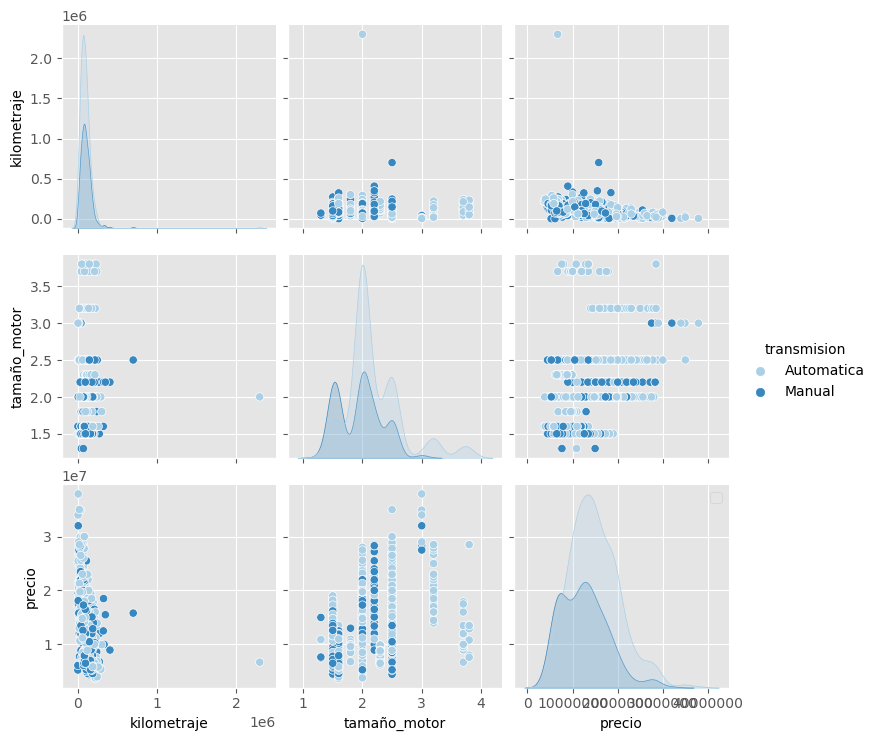

In [26]:
plt.style.use('ggplot')

col = ['modelo', 'kilometraje', 'tamaño_motor', 'precio', 'transmision', 'region']

sns.pairplot(data= df[col],hue= 'transmision', palette= 'Blues')

plt.ticklabel_format(style='plain', axis='both')
plt.legend(loc="best")
plt.show()

Como podemos ver en los pairplots, tenemos outliers en las columnas __'kilometraje' y 'precio'__

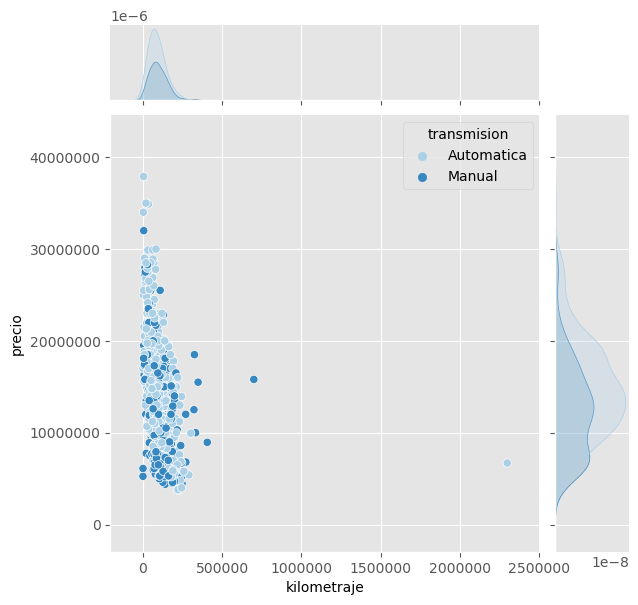

In [27]:
plt.style.use('ggplot')

sns.jointplot(x=df['kilometraje'], y= df['precio'], data = df, hue='transmision', palette= 'Blues')

plt.ticklabel_format(style='plain', axis='both')

plt.show()

In [28]:
df[df['kilometraje']>500000]

,id,marca,modelo,año,kilometraje,tamaño_motor,combustible,transmision,precio,region,enlace
422,CL-AD-13005589,Mazda,5,2012,2300000,2.0,Bencina,Automatica,6700000,Región Metropolitana de Santiago,https://www.chileautos.cl/vehiculos/detalles/2...
946,CL-AD-11731230,Mazda,3,2017,700000,2.5,Bencina,Manual,15800000,Región Metropolitana de Santiago,https://www.chileautos.cl/vehiculos/detalles/2...


Esto son los dos autos que presenta outliers en la columna 'kilometraje':
- https://www.chileautos.cl/vehiculos/detalles/2012-mazda-5-2-0-mav-v-auto/CL-AD-13005589/?Cr=418
- https://www.chileautos.cl/vehiculos/detalles/2017-mazda-3-sport/CL-AD-11731230/?Cr=943

Al ver el anuncio, comparar el año de ambos vehículos, y su condición, podemos establecer que se trata de un error de digitación de kilometraje, al haber agregado un 0 de más, por lo que ambos serán divididos en 10 para dar el kilometraje correcto.

In [29]:
df.at[422, "kilometraje"] = df.at[422, "kilometraje"] / 10
df.at[946, "kilometraje"] = df.at[946, "kilometraje"] / 10

In [30]:
df[df['precio']>35000000]

,id,marca,modelo,año,kilometraje,tamaño_motor,combustible,transmision,precio,region,enlace
157,CP-AD-8259947,Mazda,BT-50,2023,4000,3.0,Diesel,Automatica,37900000,Región del Bío-Bío,https://www.chileautos.cl/vehiculos/detalles/2...


Lo que habíamos considerado outlier en 'precio', comparando con la publicación original, resultó ser un precio real. Por lo que la columna 'precio' no presenta outliers.

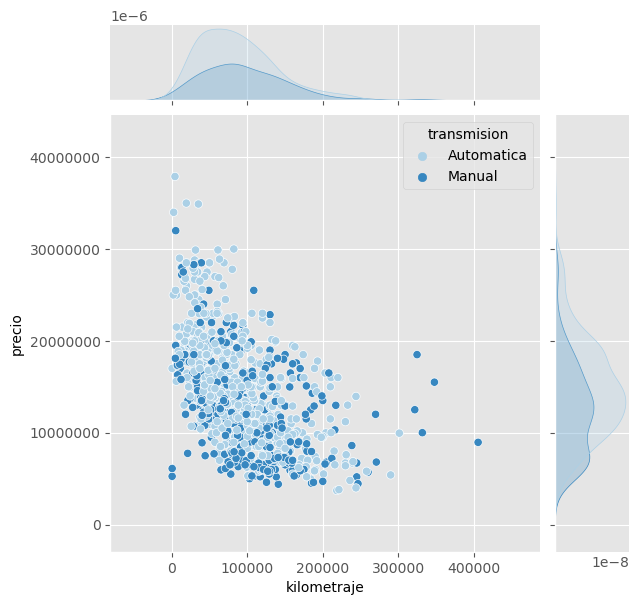

In [31]:
plt.style.use('ggplot')

sns.jointplot(x=df['kilometraje'], y= df['precio'], data = df, hue='transmision', palette= 'Blues')

plt.ticklabel_format(style='plain', axis='both')

plt.show()

***
# Resumen del Data Cleaning

- Se eliminaron duplicados
- Se reemplazaron las columnas marca y modelo por las obtenidas desde el título.
- Se crearon las columnas 'año' y 'tamaño_motor' desde el título.
- Se limpió la columna de 'marca' dejando solo 'Mazda'.
- Se corrigieron los nombres de los modelos.
- Se corrigió un error de indexación en la fila 142.
- Se limpió la columna 'combustible'
- La comuna localidad se transformó en 'region', donde se filtró cada localidad por region.
- Se convirtieron las columnas de tipo 'object' a 'int' o 'float' según correspondía.
- Los elementos faltantes de 'tamaño_motor' fueron reemplazados por la mediana.
- Se encontraron outliers en la columna 'kilometraje', los que fueron corregidos.

***
# Visualización

## Correlación entre variables

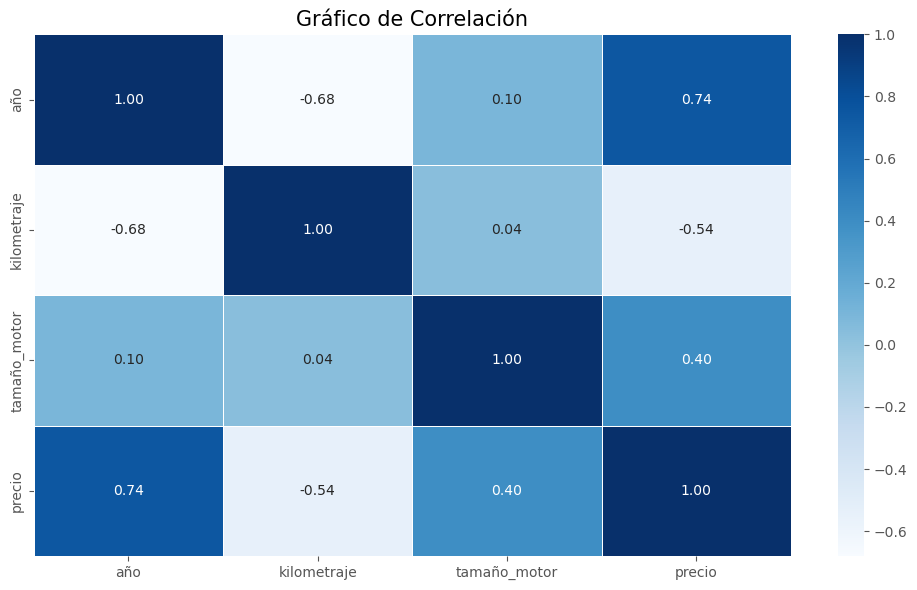

In [32]:
plt.style.use('ggplot')
plt.figure(figsize=(10,6))

correlacion = df.drop(columns= ['id', 'marca', 'modelo', 'enlace', 'combustible', 'transmision', 'region']).corr()

sns.heatmap(correlacion, annot=True, linewidth=.5, fmt= '.2f', cmap= 'Blues')

plt.title("Gráfico de Correlación", fontsize=15)

plt.tight_layout()
plt.show()

Las relaciones entre las variables numéricas más importantes está en: 
- Mientras más nuevo sea el vehículo, menos kilometraje tendrá y más caro será.
- Mientras más grande sea el motor, tiende a ser más caro.

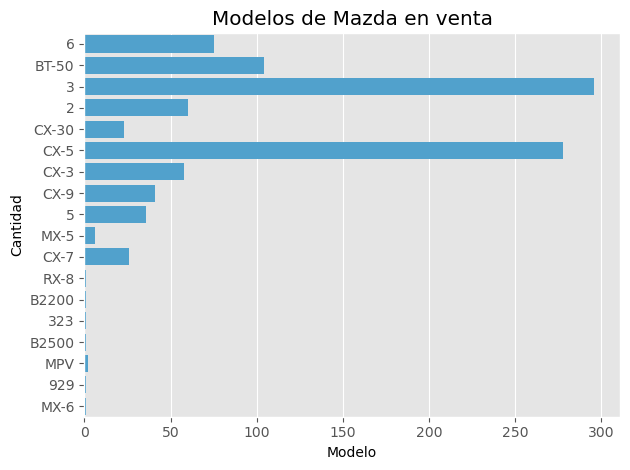

In [33]:
plt.style.use('ggplot')

sns.countplot(data= df, y= df['modelo'], color= '#3ca7e1')
plt.title('Modelos de Mazda en venta')
plt.xlabel('Modelo')
plt.ylabel('Cantidad')

plt.tight_layout()
plt.show()

- La mayor cantidad de vehículos Mazda publicados son de modelo Mazda 3 y Mazda CX-5 por lejos. 

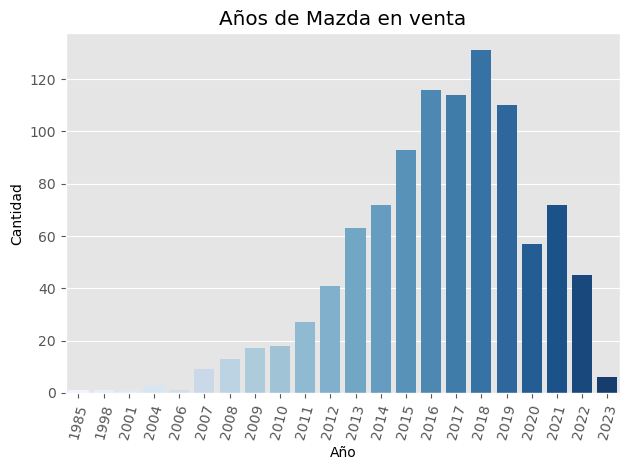

In [34]:
plt.style.use('ggplot')

sns.countplot(data= df, x= df['año'], palette= 'Blues')
plt.title('Años de Mazda en venta')
plt.xlabel('Año')
plt.ylabel('Cantidad')

plt.xticks(rotation=75)

plt.tight_layout()
plt.show()

- Los Mazdas con más oferta rondan entre modelos 2016 y 2019

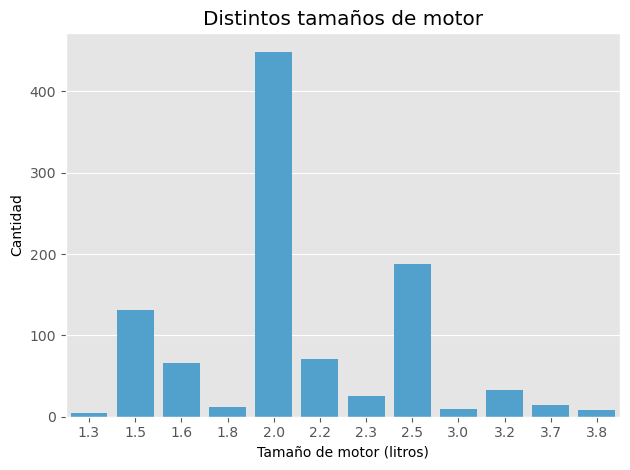

In [35]:
plt.style.use('ggplot')

sns.countplot(data= df, x= df['tamaño_motor'], color= '#3ca7e1')
plt.title('Distintos tamaños de motor')
plt.xlabel('Tamaño de motor (litros)')
plt.ylabel('Cantidad')

plt.tight_layout()
plt.show()

- El tamaño de motor más recurrente suele ser 2.0 litros, seguido por 2.5 y 1.5 litros.

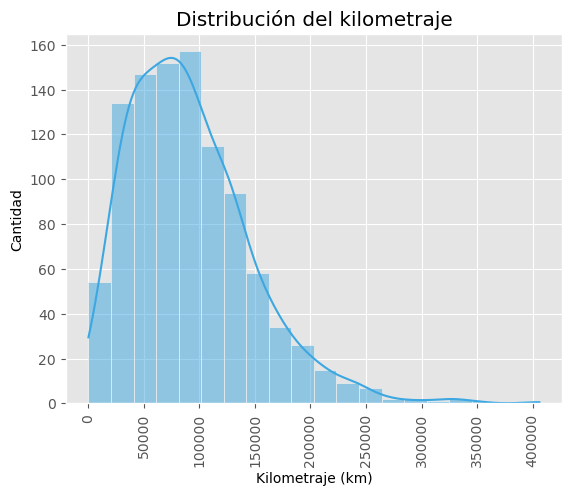

In [36]:
plt.style.use('ggplot')

sns.histplot(df['kilometraje'],
             bins= 20,
             kde= True,
             fill=True,
             color= '#3ca7e1')

plt.title('Distribución del kilometraje')
plt.xlabel('Kilometraje (km)')
plt.ylabel('Cantidad')

plt.xticks(rotation=90)

plt.show()

- La mayoría de autos publicados tiene cerca de 50.000 y 100.000 kilómetros

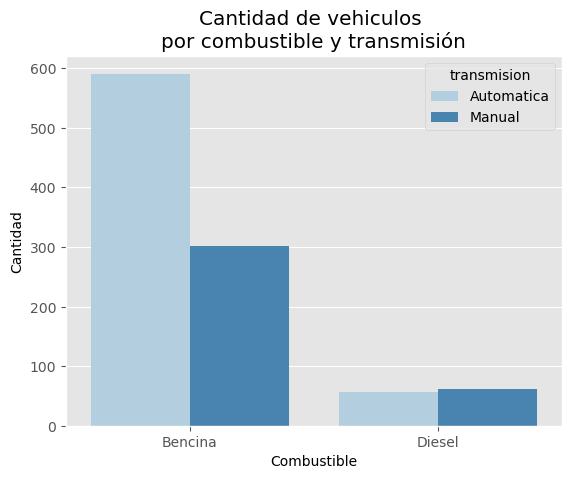

In [37]:
plt.style.use('ggplot')

sns.countplot(data= df, x= df['combustible'], hue= df['transmision'], palette= 'Blues')

plt.title('Cantidad de vehiculos \npor combustible y transmisión')
plt.xlabel('Combustible')
plt.ylabel('Cantidad')

plt.show()

- Existe una mayor oferta de vehículos a Bencina del tipo Automático.
- Sin embargo, en las versiones Diesel la transmisión manual lleva la delantera.

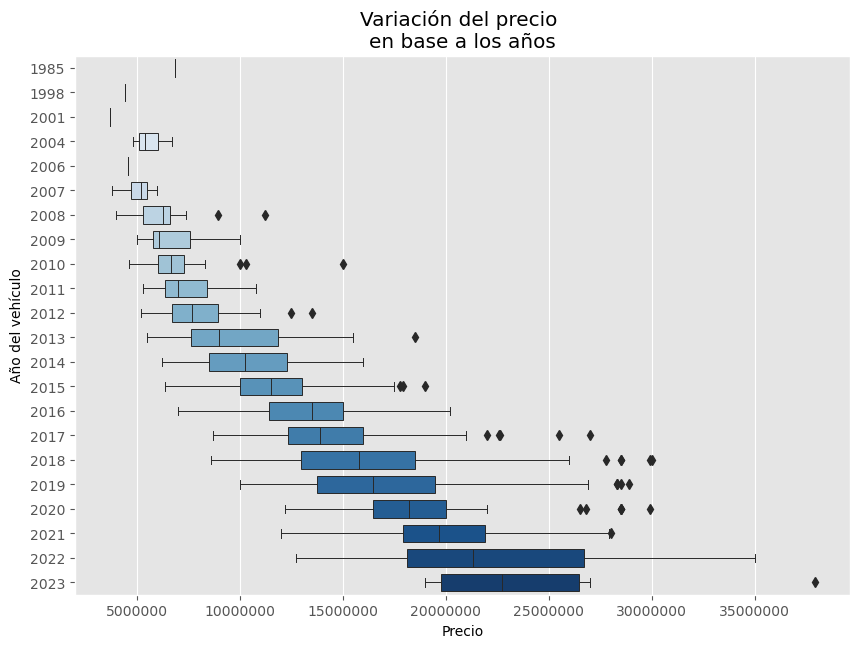

In [38]:
plt.style.use('ggplot')

plt.figure(figsize=(10, 7))

sns.boxplot(data=df,
            x='precio',
            y='año',
            width=0.7,
            orient= 'h',
            linewidth = 0.7,
            palette = "Blues")

plt.ticklabel_format(style='plain', axis='x')
plt.xlabel('Precio')
plt.ylabel('Año del vehículo')

plt.title("Variación del precio \nen base a los años")
plt.show()

- Entre más nuevo el auto, más caro es.
- En promedio, los autos del año 2023 son más caros que los del año anterior, sin embargo, los rangos de precio aún no superan al 2022.

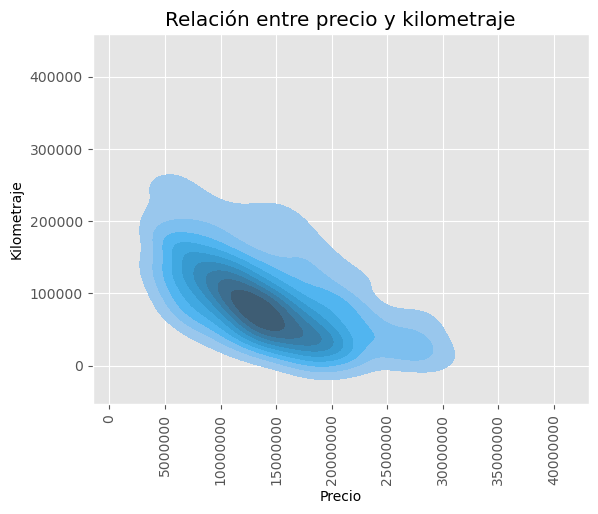

In [39]:
plt.style.use('ggplot')

sns.kdeplot(data= df, x='precio', y= 'kilometraje', fill= True, color= '#3ca7e1')

plt.ticklabel_format(style='plain', axis='x')

plt.xticks(rotation=90)
plt.title("Relación entre precio y kilometraje")
plt.xlabel('Precio')
plt.ylabel('Kilometraje')

plt.show()

- Es posible apreciar la correlación negativa entre las variables de precio y kilometraje de manera evidente.
- La mayoría de autos en venta se centran entre los 10 y 15 millones de pesos, sumando no más de 100.000 kilómetros

***
# Conclusión

En resumen, este proyecto ofrece una valiosa perspectiva sobre el mercado de vehículos Mazda en Chile. Hemos identificado patrones claros que revelan la influencia del año de fabricación y el tipo de motor en los precios de los automóviles. Los modelos Mazda 3 y Mazda CX-5 se destacan como los favoritos del público, y la mayoría de las ofertas se concentran en vehículos producidos entre 2016 y 2019. Además, hemos observado que la transmisión automática es la elección predominante en vehículos a gasolina, mientras que la transmisión manual lidera por poco en vehículos diésel. La relación negativa entre el precio y el kilometraje es evidente, con la mayoría de los autos en venta en el atractivo rango de 10 a 15 millones de pesos y un kilometraje inferior a 100,000 kilómetros. Por último, los precios de los automóviles del año 2023 tienden a ser más elevados en promedio, aunque aún no superan a los del año 2022. Este análisis proporciona información valiosa para quienes buscan adquirir un vehículo en Chile.

**Pablo Arriagada Ojeda | 2023**